# Linear regression Using Ordinary Least Squares (OLS)


For least-squares regression, we can find optimal linear regression parameters directly using linear algebra, avoiding the need to use gradient descent. 

This approach is known as Ordinary Least Squares (OLS)

* OLS provides a closed-form solution to finding these optimal parameters.
* As a reminder:
    - $\beta_j$ represents a weight for variable $x_j$
    - $\beta_0$ represents the bias term
* We'll use matrix notation to simplify the calculation of finding the optimal parameters with OLS.
* Matrix notation also simplifies the calculation when you have more than one explanatory variable in the data.



* The equation below calculates the prediction $\hat{y}$ for each observation with the optimal weights $\beta$ found for only one explanatory variable $x$.


$$
\hat{y}=\beta_0+\sum_{j=1}^J x_j \beta_j .
$$  

Note: $J$ is number of explanatory variable in the data.

Recall:
* $\hat{y}$ : the prediction
* $x_j$ : explanatory variable 
* $\beta_j$ : weight for variable $j$
* $\beta_0$ : bias term

### Matrix multiplication in the univariate case

* We can represent our 1 explanatory variable and 2 parameters as:

$$X = \underset{\small (N,2)}{\begin{bmatrix} 1 & x_{1,1} \\ \vdots & \vdots \\ 1 & x_{n,1}\end{bmatrix}} \quad \quad \mathbf{\beta} = \underset{\small (2,1)} {\begin{bmatrix} \beta_0  \\ \beta_1 \end{bmatrix}}$$

* The first column of our matrix $X$ contains the constant 1 which will account for the bias term $\beta_0$.

* Note the shape for the input matrix $X$ (N,2) and the parameter vector $\beta$ (2,1)





* We get the prediction for each observation by multiplying matrix $X$ with vector $\beta$:

$$
\hat{Y} = X\beta
$$


$$
(N,1) = (N,2).(2,1)
$$

* This is the matrix that contains the predictions for each of the $n$ observations:

$$
\hat{Y} = \underset{\small (N,1)}{\begin{bmatrix} \beta_{0} + \beta_{1} x_{1,1} \\ \beta_{0} + \beta_{1} x_{1,2}\\ \vdots \\\beta_{0} + \beta_{1} x_{1N}  \end{bmatrix}}.
$$

## Linear Regression: Using OLS to calculate the optimal parameters

For OLS regression we calculate the **optimal values** $\beta^*$ analytically.

Steps for OLS regression:

- Take the **derivative** of the SSE wrt. $\beta$.
- Set the **gradient to zero** and **solve** for $\beta$ - this will be the point where the error function is at its lowest.
- **Ordinary least squares** with the $\operatorname{SSE}$ has **one solution**. 




The first thing we need to calculate the optimal parameters is the sum of squared errors (SSE).

* SSE is the squared difference between the prediction $\widehat{y}$ and the response variable $y$ summed over all observations $N$.
* Prior to using **matrix notation** we expressed the SSE as:
$$\operatorname{SSE} = \sum_{i=1}^{n}(y_i - \widehat{y}_i)^2 \quad$$
* We know $\hat{y}$ can also be expressed as:
$$
\operatorname{SSE}  =\sum_{i=1}^N(y_i - X\beta)^2 \\
$$
* We can **rewrite** this in matrix notation as:

$$
\operatorname{SSE} = (Y - X\beta)^\top (Y - X\beta)
$$



(because for a vector $v$, $\sum_i v_i^2 = v^\top v$)

* We want to find $\beta$ that **minimises** the SSE:

* Differentiate SSE with respect to $\beta$ and set it equal to 0

$$
\nabla_\beta \operatorname{SSE} = 0
$$


* With some linear algebra we can express the derivative as:
$$
\begin{align}
\nabla_\beta \operatorname{SSE} & = \nabla_\beta (y-X\beta)^\top (y-X\beta) \\ 
& = -2 X^\top \ (y-X\beta) \\
& = 2{X^\top X\beta} - 2{X^\top y} \\
\end{align}
$$

* Where we used the **matrix derivative rule**:  $\nabla_\beta A^\top A = 2 (\nabla_\beta A)^\top A$ 

* The value of $\beta$ where this function = 0 is the minimum. 

* Now we have a **gradient term** for the SSE wrt. $\beta$. 


* Next, **set the gradient equal to zero** and solve for $\beta$:

$$
\begin{align}
2X^\top X\beta^* - 2X^\top y & = 0 \\
2X^\top X\beta^* & = 2X^\top y  \\
(X^\top X)^{-1} (X^\top X)^{1} \beta^* & = (X^\top X)^{-1} X^\top y  \\
\beta^* & = (X^\top X)^{-1} X^\top y \\
\end{align}
$$

* If we set the gradient equal to zero, then we can rearrange the equation so that we just have beta on the left hand side and that will tell us to what to set beta to minimise the $\operatorname{SSE}$ for $\beta$. 

* In the last step we **assume that the matrix** $(X^\top X)$ is **invertible**. 

* If this isn't the case there are a few workarounds (generalized inverse or **regularization**), but we won't go into that here. 

* So now we have an equation which will tell us which values of $\beta$ will give the smallest $\operatorname{SSE}$.

### Example: Solving for the optimal parameters with OLS in the univariate case

We generate 1D data with additive Gaussian noise.

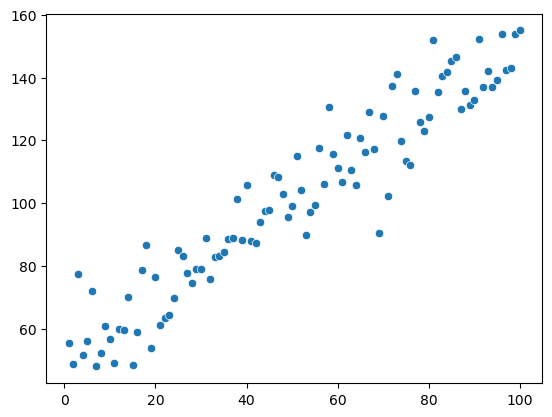

In [10]:
# Making the imports
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# To make sure random results are the same each time:
np.random.seed(5)

# Generate monotonic increasing values for x, 1 to 100
x = np.linspace(1,100, 100)

# Add a little random noise to each x, to get a y value
y = [i + 50 + np.random.normal(loc=0, scale=10) for i in x]

sns.scatterplot(x=x, y=y);

We can calculate the closed-form OLS solution for the optimal parameters as follows:

$$
\begin{align}
 \beta^* & = (X^\top X)^{-1} X^\top y  \\
\end{align}
$$

- We use the function `np.hstack` to add a column of ones to the original data $X$.

- `np.linalg.inv` is used to calculate the inverse of a matrix.

- The `@` operation is used for matrix multiplication.

- Lastly, `.T` transposes the matrix.





Now, we can calculate the predictions:

$$
\hat{Y} = X\beta
$$

And create a plot of the line of best fit/linear regression.

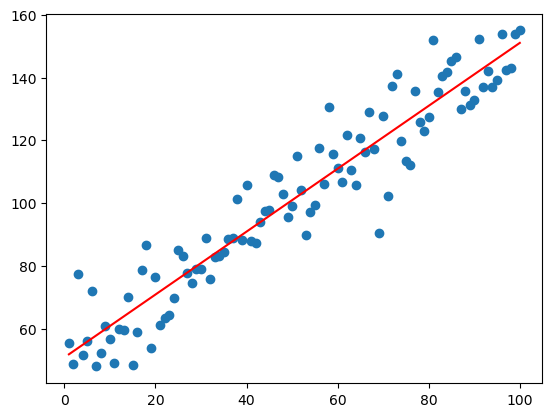

In [11]:
# Reshape X
X = x.reshape(-1, 1)
# Add a column of ones
X = np.hstack((np.ones(X.shape), X))

# Calculate the optimal parameters with the closed form solution equation
beta = np.linalg.inv(X.T @ X) @ np.dot(X.T, y)
    
# Calculate the prediction for each observation
Y_Jred = X @ beta                    
    
# Plot the predictions
plt.scatter(x=x, y=y) 
plt.plot([min(x), max(x)], [min(Y_Jred), max(Y_Jred)], color='red')  # linear regression line in red
plt.show()

We can calculate the MSE for the line of best fit with these optimal parameters.

In [ ]:
# Calculate the MSE for this line of best fit
def mse(y, y_Jred):
    return np.mean((y-y_Jred)**2)

print(f'MSE for OLS: {mse(y, Y_Jred):.3f}')

### Matrix multiplication in the multivariate case

* A multivariate linear regression model will predict observations with more than one explanatory variable and the response variable.

* When we have $J$ features in the data we have an $X$ matrix and $\beta$ vector as follows:

$$
X =  \underset{\small (N,J)}{\begin{bmatrix} 1 & x_{1,1} & x_{2,1} & \dots & x_{J,1}\\ 1 & x_{1,2} & x_{2,2} & \dots & x_{J,2}\\ \vdots & \vdots & \vdots & & \vdots\\ 1 & x_{1N} & x_{2N} & \dots & x_{JN} \end{bmatrix}} \hspace{20pt}  \beta = \underset{\small (J,1)} {\begin{bmatrix}  \beta_{0} \\  \beta_{1} \\ \vdots\\  \beta_J \end{bmatrix}}.
$$

* The first column of our matrix $X$ containg the constant 1 will account for the bias term $\beta_0$.

* Note the shape for the input matrix $X$ is ($N$,$J$) and the parameter vector $\beta$ is ($J$,1), where $J$ is the number of explanatory variables.



* The matrix $\hat{Y}$ then contains the predictions for each of the $N$ observations:

$$
\hat{Y} = X\beta
$$

$$
(N,1) = (N,J).(J,1)
$$




$$
\hat{Y} =  \underset{\small (N,1)}{\begin{bmatrix} \beta_{0} + \beta_{1} x_{1,1} + \beta_{2} x_{2,1} + \cdots + \beta_Jx_{J,1}\\ \beta_{0} + \beta_{1} x_{1,2} + \beta_{2} x_{2,2} + \cdots + \beta_Jx_{J,2}\\ \vdots \\\beta_{0} + \beta_{1} x_{1N} + \beta_{2} x_{2N} + \cdots + \beta_Jx_{JN} \end{bmatrix}.}
$$




* The general form for each element of $\hat{Y}$ is

$$
\hat{y_i} = \beta_{0} +
\beta_{1} x_{1,i} + \beta_{2} x_{2,i} + \cdots + \beta_J x_{J,i}
$$

* Where $\hat{y}_i$ is the predicted response and $x_{1,i},…,x_{J,i}$ are the $J$ explanatory variables. 

* The parameters $\beta_0,…,\beta_J$ are the weights of each of the explanatory variables.

## OLS for multivariate regression in Python

Here we provide the code to generate data with 2 independently normally explanatory variables, with additive random noise. 

In [5]:
import numpy as np

# Generate data with 2 features and a target variable
def generate_data_3d(n):
    np.random.seed(n)
    X = np.stack([np.random.normal(scale=2, size=n), np.random.normal(scale=5, size=n)]).T
    beta = np.absolute(np.random.randn(3))
    # add slight some standard normal noise
    y = beta[0] + beta[1]*X[:,0] + beta[2]*X[:,1] + np.random.normal(scale=1, size=n)
    return X, y, beta

n = 100
x, y, beta_true = generate_data_3d(n)

x.shape


(100, 2)

We use plotly express to plot an interactive 3D scatter of our data:

In [6]:
import plotly.express as px
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=y, labels = { 'x':'x1', 'y':'x2', 'z':'y'})
fig.show()

#### OLS closed form solution 
We use OLS matrix inversion to compute the optimal parameters 

In [7]:
X = np.hstack((np.ones((100,1)), x))

# Calculate the optimal parameters with the closed form solution for OLS
beta = np.linalg.inv(X.T @ X) @ np.dot(X.T, y)
print(beta)
    
# Calculate the prediction for each obsevation
Y_pred_ols = X @ beta  

[0.71325107 0.83982661 0.56710951]


#### Visualising our solution

In [9]:
import plotly.graph_objects as go

fig1 = px.scatter_3d(x=X[:, 1], y=X[:, 2], z=y, labels = { 'x':'x1', 'y':'x2', 'z':'y'})

# Create a mesh grid to get predictions for and plot a hyperplane
xy = np.array([[i,j] for i in np.linspace(-4,4,20) for j in np.linspace(-15,10,60)])
y_plane = np.hstack((np.ones((1200,1)), xy))@beta

fig2 = go.Scatter3d(x=xy[:,0], y=xy[:,1], z=y_plane, opacity=0.7,  mode='markers',
    marker=dict(
        size=4,
        color=np.ones_like(y_plane),
        colorscale='Viridis',
        opacity=0.8
    )
)
fig3 = go.Figure(data=(fig2,)+ fig1.data)

fig3.update_layout(
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='y',
    )
)

fig3.show()